In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

import cooler
import bioframe
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
import csv

bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [2]:

left = bioframe.read_table('/home/kimj50/cohesin_paper/_notebook_v3/fontanka_calls/fontanka_FS0.2_Scharr95_ctr_wapl_left_unique.bed',schema='bed3')
right = bioframe.read_table('/home/kimj50/cohesin_paper/_notebook_v3/fontanka_calls/fontanka_FS0.2_Scharr95_ctr_wapl_right_unique.bed',schema='bed3')

left['chrom'] = 'chr'+left['chrom']
right['chrom'] = 'chr'+right['chrom']

smc3_ca1200_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_CA1200_1hrauxin_avg_JK165_JK166_chip_summits.bed',schema='bed6')
nipbl_ca1200_s = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_CA1200_1hrauxin_avg_chip_summits.bed',schema='bed6')
pol2_ca1200_s = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/8WG16_CA1200_1hrauxin_avg_chip_summits.bed',schema='bed6')



In [3]:
def fountain_summits(fountain_origin,summit,maxD):
    # assign to nearest origin #
    fountain_origin['mid'] = (fountain_origin.start+fountain_origin.end) // 2
    fountain_origin['mid1'] = fountain_origin['mid']+1
    
    origin_s = bioframe.closest(summit,fountain_origin,cols2=('chrom','mid','mid1'))
#    print(origin_s)
    origin_s_up_bool = origin_s.start_1 < origin_s.mid_2
    origin_s_down_bool = origin_s.start_1 > origin_s.mid_2

    origin_s_up = origin_s.distance[origin_s.distance < maxD][origin_s_up_bool]*-1
    origin_s_down = origin_s.distance[origin_s.distance < maxD][origin_s_down_bool]

    origins_s_dist = np.concatenate([origin_s_up,origin_s_down])

    return origins_s_dist

origins = [left,right]

origins_smc3 = []
origins_nipbl = []
origins_pol2 = []
maxD = 40_000
for i in origins:
    a = fountain_summits(i,smc3_ca1200_s,maxD)
    b = fountain_summits(i,nipbl_ca1200_s,maxD)
    c = fountain_summits(i,pol2_ca1200_s,maxD)
    origins_smc3.append(a)
    origins_nipbl.append(b)
    origins_pol2.append(c)



-40000 40000
-40000 40000
-40000 40000


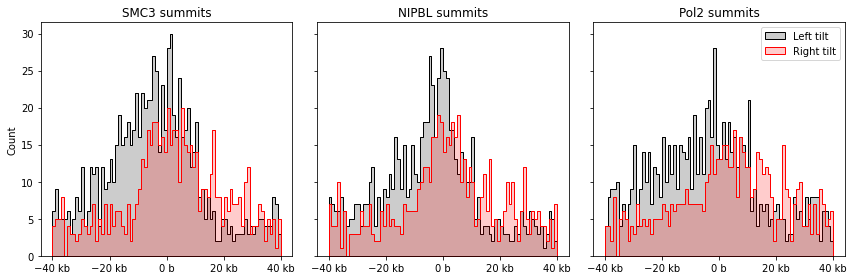

In [4]:
# Create the plot

f, axs = plt.subplots(
    figsize=(12, 4),
    nrows=1,
    ncols=3,
    sharex=True,sharey=True
)
# Compute the bin edges

dats = [origins_smc3,origins_nipbl,origins_pol2]
colors = ['black','red']
subtitles = ['SMC3 summits','NIPBL summits','Pol2 summits']
for d in range(len(dats)):
    dat = dats[d]
    bin_width = 1000
    min_edge = maxD*-1
    max_edge = maxD
    print(min_edge,max_edge)
    bins = np.arange(min_edge, max_edge + bin_width, bin_width)

    ax=axs[d]
    a=sns.histplot(ax=ax,data=dat[0], bins=bins, alpha=0.2, element='step', color='black', stat='count')
    a=sns.histplot(ax=ax,data=dat[1], bins=bins, alpha=0.2, element='step', color='red', stat='count')

    axs[d].set_xlabel('')
    format_ticks(ax=axs[d],x=True,y=False,rotate=False)
    axs[d].set_title(subtitles[d])


#plt.ylabel('Count')
#plt.title('Comparison of smc3_right and smc3_left Histograms')

# Show the plot
plt.legend(['Left tilt', 'Right tilt'])
plt.tight_layout()